In [26]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


# Bertopic Analysis

### Load Data

In [27]:
import pandas as pd

data = pd.read_csv("../data/toxic_companys_brasil.csv")

### Process Data

In [28]:
data = data.fillna("")

In [29]:
data.shape

(6558, 6)

In [30]:
data["Reason"] = data["Reason"].apply(str)
data = data[data["Reason"].apply(lambda x: len(x.split(" ")) > 5)]
documents = data["Reason"].tolist()

In [31]:
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/letrus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
from bertopic import BERTopic
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

SEED = 42
# remove some
vectorizer_model = CountVectorizer(
    stop_words=stopwords.words("portuguese")
    + stopwords.words("english")
    + [
        "pra",
        "nada",
        "cu",
        "dá",
        "todo",
        "tudo",
        "embora",
        "pessoa",
        "ter",
        "vc",
        "vai",
        "fica",
    ]
)
cluster_model = KMeans(n_clusters=10, random_state=SEED)

topic_model = BERTopic(
    hdbscan_model=cluster_model,
    top_n_words=4,
    language="portuguese",
    vectorizer_model=vectorizer_model,
)

In [33]:
topics, probs = topic_model.fit_transform(documents)

In [34]:
%matplotlib inline
topic_model.visualize_topics()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'assédio | moral | empresa | ambiente', 997],
                                   [1, 'empresa | gestão | funcionários | carreira', 939],
                                   [2, 'empresa | liderança | ceo | funcionários', 906],
                                   [3, 'salário | empresa | pj | pagam', 679],
                                   [4, 'empresa | pessoas | cultura | ambiente', 632],
                                   [5, 'funcionários | saúde | trabalho | burnout', 516],
                                   [6, 'horas | dia | trabalhar | hora', 477],
                                   [7, 'funcionários | dono | empresa | gerente', 464],
                                   [8, 'empresa | demissão | sofri | moral', 325],
                                   [9, 'comando | escolta | azeda | nao', 59]], dtype=object),
              'hovertemplate': '<b>Topic %{customdata[0]}</b><br>%{customdata[1]}<br>Size: %{customdata[2]}',
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': array([997, 939, 906, 679, 632, 516, 477, 464, 325,  59]),
                         'sizemode': 'area',
                         'sizeref': 0.623125,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 2.9870458, -2.697034 , -2.2865777, -3.1503553,  3.4655426,  3.4136126,
                          -3.395681 , -1.862831 ,  3.8764577, -1.5251676], dtype=float32),
              'xaxis': 'x',
              'y': array([22.424133 , -5.232694 , -5.796574 , -4.627405 , 21.92295  , 22.687176 ,
                          -4.3392773, -6.3601084, 22.530935 , -6.7429175], dtype=float32),
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'D1',
                                'x': -3.9050330400466917,
                                'y': 9.167948472499848,
                                'yshift': 10},
                               {'showarrow': False,
                                'text': 'D2',
                                'x': 0.27644665241241473,
                                'xshift': 10,
                                'y': 26.090252113342284}],
               'height': 650,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'shapes': [{'line': {'color': '#CFD8DC', 'width': 2},
                           'type': 'line',
                           'x0': 0.27644665241241473,
                           'x1': 0.27644665241241473,
                           'y0': -7.75435516834259,
                           'y1': 26.090252113342284},
                          {'line': {'color': '#9E9E9E', 'width': 2},
                           'type': 'line',
                           'x0': -3.9050330400466917,
                           'x1': 4.457926344871521,
                           'y0': 9.167948472499848,
                           'y1': 9.167948472499848}],
               'sliders': [{'active': 0,
                            'pad': {'t': 50},
                            'steps': [{'args': [{'marker.color': [['red',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
           

In [35]:
%matplotlib inline
topic_model.visualize_heatmap()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Similarity Score: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': [0_assédio_moral_empresa, 1_empresa_gestão_funcionários,
                    2_empresa_liderança_ceo, 3_salário_empresa_pj,
                    4_empresa_pessoas_cultura, 5_funcionários_saúde_trabalho,
                    6_horas_dia_trabalhar, 7_funcionários_dono_empresa,
                    8_empresa_demissão_sofri, 9_comando_escolta_azeda],
              'xaxis': 'x',
              'y': [0_assédio_moral_empresa, 1_empresa_gestão_funcionários,
                    2_empresa_liderança_ceo, 3_salário_empresa_pj,
                    4_empresa_pessoas_cultura, 5_funcionários_saúde_trabalho,
                    6_horas_dia_trabalhar, 7_funcionários_dono_empresa,
                    8_empresa_demissão_sofri, 9_comando_escolta_azeda],
              'yaxis': 'y',
              'z': array([[1.        , 0.7485653 , 0.83413476, 0.69097215, 0.8664899 ,
                           0.9030914 , 0.6426673 , 0.7999006 , 0.7070463 , 0.37864453],
                          [0.7485653 , 0.99999994, 0.9096995 , 0.88930047, 0.8995319 ,
                           0.86859256, 0.78746015, 0.7753203 , 0.74184036, 0.34242094],
                          [0.83413476, 0.9096995 , 1.0000001 , 0.80002815, 0.8933763 ,
                           0.8683708 , 0.72984755, 0.8446503 , 0.7524841 , 0.38283533],
                          [0.69097215, 0.88930047, 0.80002815, 1.        , 0.8232375 ,
                           0.8525347 , 0.8663252 , 0.76569825, 0.73629975, 0.33008605],
                          [0.8664899 , 0.8995319 , 0.8933763 , 0.8232375 , 1.0000005 ,
                           0.91429454, 0.75163406, 0.8192722 , 0.690557  , 0.4459008 ],
                          [0.9030914 , 0.86859256, 0.8683708 , 0.8525347 , 0.91429454,
                           0.9999998 , 0.8166253 , 0.814555  , 0.7802612 , 0.37505788],
                          [0.6426673 , 0.78746015, 0.72984755, 0.8663252 , 0.75163406,
                           0.8166253 , 1.        , 0.76567924, 0.7225126 , 0.34828213],
                          [0.7999006 , 0.7753203 , 0.8446503 , 0.76569825, 0.8192722 ,
                           0.814555  , 0.76567924, 1.        , 0.7539832 , 0.4603943 ],
                          [0.7070463 , 0.74184036, 0.7524841 , 0.73629975, 0.690557  ,
                           0.7802612 , 0.7225126 , 0.7539832 , 0.9999996 , 0.23948993],
                          [0.37864453, 0.34242094, 0.38283533, 0.33008605, 0.4459008 ,
                           0.37505788, 0.34828213, 0.4603943 , 0.23948993, 1.0000002 ]],
                         dtype=float32)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Similarity Score'}},
                             'colorscale': [[0.0, 'rgb(247,252,240)'], [0.125,
                                            'rgb(224,243,219)'], [0.25,
                                            'rgb(204,235,197)'], [0.375,
                                            'rgb(168,221,181)'], [0.5,
                                            'rgb(123,204,196)'], [0.625,
                                            'rgb(78,179,211)'], [0.75,
                                            'rgb(43,140,190)'], [0.875,
                                            'rgb(8,104,172)'], [1.0,
                                            'rgb(8,64,129)']]},
               'height': 800,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'title': {'text': 'Trend'}},
               'margin': {'t': 60},
               'showlegend': True,
               'template': '...',
               'title': {'font': {'color': 'Black', 'size': 22},
                         'text': '<b>Similarity Matrix</b>',
                         'x': 0.55,
                         'xanchor': 'center'

In [36]:
topics_words_list = []
for topic in topics:
    topics_words_list.append(topic_model.get_topic(topic))

In [37]:
topics_words = []
for i in topic_model.get_topics():
    words = topic_model.get_topic(i)
    words_string = ", ".join([w[0] for w in words[:10]])
    topics_words.append(words_string)

In [38]:
topics_words

['assédio, moral, empresa, ambiente',
 'empresa, gestão, funcionários, carreira',
 'empresa, liderança, ceo, funcionários',
 'salário, empresa, pj, pagam',
 'empresa, pessoas, cultura, ambiente',
 'funcionários, saúde, trabalho, burnout',
 'horas, dia, trabalhar, hora',
 'funcionários, dono, empresa, gerente',
 'empresa, demissão, sofri, moral',
 'comando, escolta, azeda, nao']

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

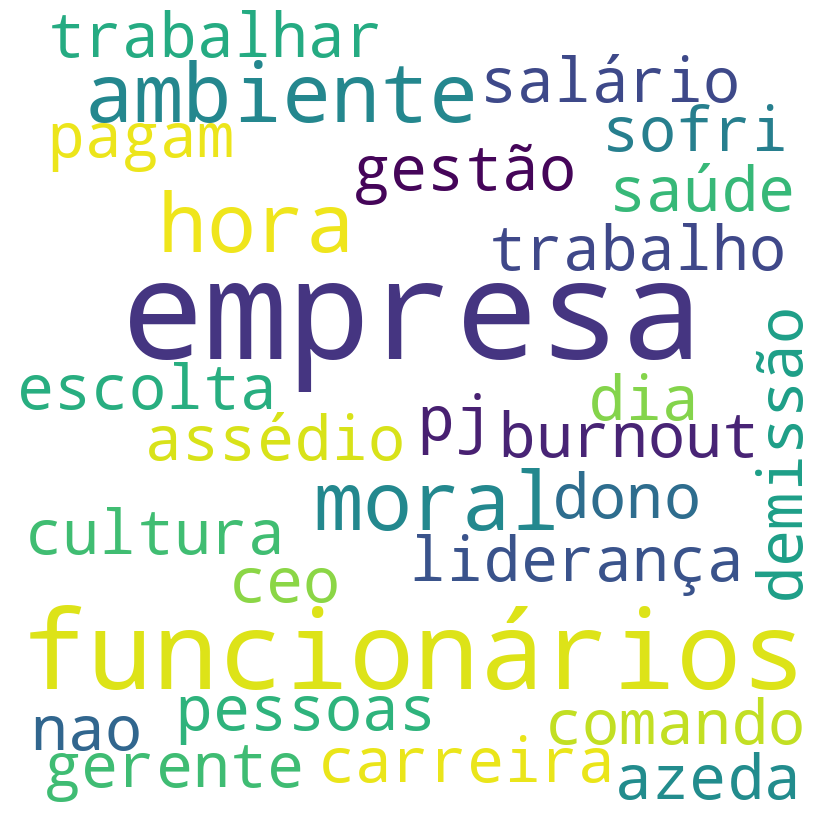

In [40]:
text = ", ".join(topics_words)

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=800, background_color="white", stopwords=[], min_font_size=10
).generate(text)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
# save as image
plt.savefig("../images/wordcloud.png")
plt.show()

In [41]:
new_data = (
    data.groupby("Company Name")
    .agg(Count=("Company Name", "size"), Reasons_Concatenated=("Reason", ", ".join))
    .reset_index()
)

In [42]:
# order by count
new_data = new_data.sort_values("Count", ascending=False)

In [43]:
top_10_companies = new_data.nlargest(10, "Count")

In [47]:
top_10_companies.to_csv("../data/top_10_companies.csv", index=False)

### GPT Generated Reasons why that company has bad feedbacks

#### Resumo dos Feedbacks Negativos - Wise System

- **Gestão Autoritária e Desorganizada**: Descrições de uma liderança comparada a ditadores, com um ambiente de trabalho extremamente tóxico e desorganizado, onde a gestão é criticada por práticas como assédio moral, falta de planejamento, e decisões impulsivas.

- **Promessas de Carreira Não Cumpridas**: Relatos frequentes de falsas promessas de crescimento profissional e plano de carreira inexistente, com estagiários sendo explorados sob promessa de efetivação que raramente se concretiza e sem aumento salarial adequado.

- **Condições de Trabalho Precárias**: Múltiplos relatos de salários baixos, sem benefícios, infraestrutura inadequada (como ventilação insuficiente e falta de limpeza), e recursos insuficientes como ferramentas de trabalho obsoletas.

- **Assédio Moral e Ambiente Tóxico**: Vários depoimentos destacam o assédio moral, com comparações extremas a um "campo de concentração emocional" e práticas humilhantes, além de uma cultura de medo e desrespeito.

- **Exploração de Estagiários**: A empresa é acusada de contratar um número excessivo de estagiários com o objetivo de reduzir custos, atribuindo-lhes responsabilidades de funcionários efetivos sem a devida compensação ou reconhecimento.

- **Desvio de Função e Falta de Treinamento**: Críticas alocam a falta de treinamento adequado para estagiários e funcionários, além de frequentes desvios de função sem aumento de remuneração ou orientação.

- **Falta de Transparência e Ética com Clientes**: Reclamações sobre a qualidade do produto ou serviço entregue, com menções a falhas no sistema e à necessidade do suporte técnico de mentir para os clientes sobre problemas e soluções.

- **Ambiente Físico Inadequado**: Comentários sobre as condições físicas de trabalho, incluindo salas sem ventilação, banheiros sujos, e uma sala de jogos fechada que serve apenas como fachada para clientes.

- **Discriminação e Preconceito**: Alusões a práticas discriminatórias, incluindo preferências de contratação baseadas em gênero e desqualificação de candidatos por preconceitos pessoais.

- **Impacto na Saúde Mental dos Funcionários**: Múltiplas referências ao impacto negativo no bem-estar e na saúde mental dos funcionários, incluindo casos de burnout e a necessidade de buscar apoio psicológico.

#### Resumo dos Feedbacks Negativos - VHSYS

- **Ambiente de Trabalho Hostil**: Funcionários relatam um ambiente tóxico com pressão excessiva, metas inalcançáveis, e uma cultura agressiva. A empresa promove uma falsa imagem de local agradável, com mesas de sinuca e ping pong, mas na prática, as pessoas são tratadas como descartáveis. Burnouts e doenças relacionadas ao estresse são comuns, evidenciando a carga de trabalho abusiva e o microgerenciamento.

- **Gestão e Liderança Problemáticas**: Críticas severas à liderança por falta de planejamento, incompetência, e comportamento incoerente, com demissões frequentes sem justificativas plausíveis. Há relatos de lideranças despreparadas, que não sabem gerir conflitos nem promover um ambiente de trabalho saudável. A direção muda de objetivos constantemente, desvalorizando e desengajando os colaboradores.

- **Assédio e Discriminação**: Vários relatos de assédio sexual e moral, especialmente por parte da direção de marketing e de lideranças. A cultura corporativa permite e até incentiva comportamentos discriminatórios e preconceituosos, incluindo machismo e nepotismo, além de uma política de promoções baseada em favoritismos e não em mérito.

- **Práticas de RH Questionáveis**: O departamento de RH é criticado por sua ineficácia em lidar com assuntos importantes, promovendo uma cultura de fofoca e puxa-saquismo. Feedbacks negativos só são dados no momento da demissão, e há coação para que os funcionários votem positivamente nas avaliações internas, visando apenas a obtenção de selos e prêmios de qualidade de trabalho.

- **Políticas de Salário e Benefícios Injustas**: Salários abaixo do mercado, especialmente em comparação aos altos lucros dos proprietários. Promoções são raras e, quando ocorrem, vêm com um aumento insignificante de salário frente ao acréscimo de responsabilidades. Benefícios são reservados apenas para aqueles próximos à liderança.

- **Cultura de Nepotismo e Favoritismo**: Relatos frequentes de nepotismo e favoritismo, onde conexões pessoais dentro da empresa sobrepõem-se ao mérito e desempenho. Isso cria desigualdades significativas e um ambiente de trabalho onde a confiança é inexistente.

#### Resumo dos Feedbacks Negativos - Accenture

- **Salários Abaixo do Mercado**: Funcionários relatam remuneração muito inferior à média do mercado, inclusive com discrepâncias significativas entre cargos similares e promoções que não refletem aumentos salariais justos.

- **Pressão Excessiva e Cultura Workaholic**: Muitas críticas à cultura da empresa que incentiva horas extras e trabalho sob pressão constante, sem consideração pelo bem-estar dos funcionários. Relatos de expectativas de disponibilidade total e encorajamento ao overworking.

- **Gestão e Liderança Deficientes**: Feedbacks frequentes sobre a falta de competência em gestão, incluindo lideranças despreparadas, falta de reconhecimento e promoções baseadas em favoritismo. Há também relatos de líderes promovendo assédio moral.

- **Falta de Empatia e Suporte ao Funcionário**: Funcionários expressam descontentamento com a falta de suporte da empresa, especialmente em termos de saúde mental e crescimento profissional. Críticas incluem a ineficácia dos programas de bem-estar e a falta de oportunidades de aprendizado.

- **Ambiente de Trabalho Tóxico e Discriminatório**: Diversos relatos de assédio moral, discriminação de gênero e práticas abusivas, incluindo situações extremas de desrespeito em reuniões. Mulheres e minorias relatam dificuldades em obter promoções.

- **Desorganização e Falta de Transparência**: Queixas sobre a gestão desorganizada de projetos, metas irrealistas e comunicação falha dentro da empresa. Funcionários sentem-se sobrecarregados devido à má distribuição de tarefas e à falta de clareza nas expectativas.

- **Desvalorização Profissional**: Além de baixos salários, muitos funcionários sentem que a empresa não valoriza suas contribuições, com relatos de sobrecarga de trabalho, atribuições de tarefas não relacionadas às suas competências e promoções lentas ou inexistentes.

#### Resumo dos Feedbacks Negativos - CI&T

- **Gestão e Liderança Inadequadas**: Muitas críticas apontam para líderes despreparados e gestores que não oferecem um plano de carreira claro, com relatos de microgerenciamento e favoritismo nas promoções. A liderança é frequentemente descrita como coerciva e tóxica, com pouca ou nenhuma empatia pelos funcionários.

- **Salários e Benefícios Insatisfatórios**: Os salários são considerados abaixo da média do mercado, com uma Participação nos Lucros e Resultados (PLR) criticada por ser muito baixa. Promoções e aumentos salariais parecem congelados, com discrepâncias salariais baseadas na localização geográfica do funcionário.

- **Cultura de Trabalho Prejudicial**: Relatos de abuso psicológico, assédio moral, discriminação, e um ambiente de trabalho onde o burnout é comum. Alguns funcionários mencionam pressão extrema para voltar ao trabalho presencial e demissões em massa que afetam negativamente o moral da equipe.

- **Desenvolvimento de Carreira e Reconhecimento**: A progressão de carreira é descrita como confusa e comparada a um trabalho de conclusão de curso (TCC) para avançar, com reconhecimentos e promoções aparentemente reservados a um grupo seleto. Há menções de um plano de desenvolvimento individual ineficaz e de uma cultura de "panelinhas".

- **Práticas de Contratação e Demissão Questionáveis**: Críticas severas quanto à maneira como a empresa lida com contratações e demissões, incluindo a contratação de seniores e a demissão subsequente de equipes inteiras. Há alegações de que a empresa promove diversidade superficialmente, com demissões visando grupos específicos posteriormente.

- **Relacionamento com Clientes e Projetos**: Relatos de vendas enganosas sobre a capacidade dos times para os clientes e de um ambiente onde a crítica ou questionamento leva a consequências negativas para os funcionários, incluindo a demissão.

- **Transparência e Comunicação**: Falta de transparência com os funcionários e falta de comunicação clara sobre expectativas e feedback. Relatos de lideranças que não praticam o que pregam, especialmente em relação ao cuidado com as pessoas e ao desenvolvimento pessoal.

#### Resumo dos Feedbacks Negativos - Nestlé

- **Ambiente de Trabalho Hostil**: Relatos incluem exigências de longas jornadas de trabalho (até 13 horas diárias), trabalho durante férias e atestados médicos, e uma cultura que incentiva a exaustão e sobrecarga de trabalho.

- **Gestão e Liderança Problemáticas**: A gerência é descrita como tóxica, com líderes despreparados e autoritários, inclusive com relatos de coação para pagamentos ao sindicato e discriminação em promoções. A liderança tende a valorizar apenas a aparência de trabalho, ignorando resultados concretos.

- **Compensação e Benefícios Inadequados**: As compensações são vistas como insuficientes frente às demandas de trabalho, com diferenças significativas entre altos executivos e funcionários comuns. Benefícios são cortados, e não há pagamento de horas extras.

- **Desrespeito à Qualidade de Vida e Saúde Mental**: A empresa é criticada por não promover um equilíbrio saudável entre vida pessoal e trabalho, ignorando casos de assédio e saúde mental. A cultura da empresa desvaloriza a necessidade de descanso e reconhecimento adequado do trabalho.

- **Práticas de Recursos Humanos Questionáveis**: Há uma falta de oportunidade e reconhecimento para estagiários e novos funcionários, além de práticas questionáveis como o não pagamento de adicional noturno e sobrecarga de trabalho sem contratação de novos funcionários para vagas existentes.

- **Cultura Corporativa Negativa**: Relatos incluem discriminação contra terceirizados, falta de diversidade em posições de liderança, e uma cultura que favorece a aparência sobre a substância, promovendo uma imagem pública descolada da realidade interna da empresa.

#### Resumo dos Feedbacks Negativos - IBM

- **Falta de Plano de Carreira**: Funcionários relatam estagnação profissional, com dificuldades de progressão na carreira dentro da empresa. Mencionam a necessidade de sair da IBM para avançar profissionalmente.

- **Remuneração e Benefícios Insatisfatórios**: Críticas à disparidade entre o valor cobrado dos clientes e o salário recebido pelos funcionários. Além disso, mudanças no regime de horas trabalhadas sem ajustes salariais adequados são destacadas.

- **Gestão e Práticas de Negócios Questionáveis**: Relatos de gestão antiquada, com práticas de bullying empresarial, assédio moral, e liderança despreparada para lidar com diversidade e inclusão. Desorganização e falta de alinhamento são pontos recorrentes.

- **Cultura Corporativa Negativa**: Cultura workaholic promovida, com presença de politicagem e favoritismo. Funcionários reportam um ambiente hostil, com pressão extrema e ausência de meritocracia.

- **Desenvolvimento e Treinamento Ineficazes**: Estagiários e funcionários relatam falta de plano concreto para formação e desenvolvimento, sendo frequentemente alocados em projetos sem orientação adequada.

- **Práticas Antiéticas**: Instruções para mentir sobre experiências e ocultar o status de estagiário em interações com clientes. Denúncias de racismo, homofobia e assédio moral são supostamente ignoradas ou mal geridas.

- **Infraestrutura e Suporte Insuficientes**: Falhas na infraestrutura para suporte a projetos, especialmente em consultorias para terceiros. Salários discrepantes dentro de equipes que desempenham funções similares.

- **Tecnologia e Processos Desatualizados**: Funcionários apontam a existência de muitos gerentes para poucos subordinados, processos desatualizados, e falta de conhecimento em tecnologias modernas por parte de "seniors" acomodados.

- **Assédio Moral e Discriminação**: Diversas menções a comportamentos discriminatórios, incluindo sexismo, capacitismo e racismo. Ambiente descrito como tóxico e desmotivador.

- **Falta de Reconhecimento e Crescimento**: Denúncias de trabalho excessivo sem reconhecimento adequado, promoções raras e critérios de avaliação não claros contribuem para a desmotivação.

#### Resumo dos Feedbacks Negativos - Itaú

- **Gestão de Recursos Humanos Deficiente**: Relatos de contratação seguida de demissão sem justa causa, inadequação no aproveitamento das competências dos funcionários, e demissões de pessoas neurodivergentes após revelação de sua condição.

- **Cultura Organizacional Tóxica**: Cultura extremamente competitiva e individualista, incentivando a competição desleal entre colaboradores e práticas de bullying, especialmente no programa de trainees. Relatos de preconceito e exclusão contra minorias.

- **Desvalorização dos Funcionários**: Críticas à política de remuneração e benefícios, incluindo a não pagamento de horas extras e PLR, além de redução de benefícios e aumento da carga de trabalho sem correspondente aumento salarial. 

- **Gestão e Liderança Problemáticas**: Lideranças tóxicas, autoritárias e desorganizadas. Denúncias de assédio moral frequentes e falta de ação efetiva do canal de denúncias (Ombudsman) diante das reclamações.

- **Falta de Estrutura e Organização**: Retorno desorganizado ao trabalho presencial, sistemas mal planejados e legados, falta de manutenção e documentação adequada. Relatos de ambientes de trabalho superlotados e falta de preparo para o modelo híbrido.

- **Processos Seletivos Questionáveis**: Percepção de que as contratações são feitas com base em indicações pessoais (QI - Quem Indica) e que o programa de Trainee é focado em competição e ego, sem oferecer um ambiente de desenvolvimento saudável.

- **Saúde Mental e Bem-Estar Ignorados**: Múltiplos relatos de situações que prejudicam a saúde mental dos funcionários, incluindo pressão excessiva, exigência de horas extras e uma cultura que ignora a importância do bem-estar dos colaboradores.

#### Resumo dos Feedbacks Negativos - Mottu

- **Condições de Trabalho Inadequadas**: Relatos de carga horária excessiva, com funcionários sendo obrigados a trabalhar até 15 horas por dia sem compensação adequada. Ambiente físico insalubre mencionado, incluindo um galpão com barulho constante e poluição do ar devido às motos, além de infraestrutura precária, como banheiros insuficientes e cadeiras desconfortáveis.

- **Cultura Organizacional Tóxica**: Cultura descrita como degradante, com ênfase excessiva no trabalho árduo ao ponto de sofrimento, microgerenciamento constante, e uma mentalidade de que não trabalhar longas horas equivale a não estar comprometido. Alegações de que a empresa promove uma cultura de trabalho presencial obrigatório, incluindo fins de semana e feriados, sem equilíbrio entre vida profissional e pessoal.

- **Gestão e Liderança Problemáticas**: Liderança descrita como despreparada e arbitrária, com relatos de decisões baseadas em achismos em vez de dados. Comentários sobre microgerenciamento por parte de vários "líderes" e uma falta de apoio ao desenvolvimento profissional dos funcionários. Há também mencionamentos de assédio moral e perseguição.

- **Práticas de RH Questionáveis**: Críticas severas quanto à gestão de recursos humanos, incluindo contratos como Pessoa Jurídica (PJ) para evitar direitos trabalhistas, falta de benefícios, e demissões sem justa causa ou direitos. Relatos de coação para avaliações positivas da empresa.

- **Discriminação e Falta de Diversidade**: Alegações de um ambiente de trabalho onde predominam práticas discriminatórias, incluindo sexismo e favoritismo, com pouca ou nenhuma representação feminina em cargos de liderança e relatos de assédio.


#### Resumo dos Feedbacks Negativos - Kabum

- **Políticas de Remuneração e Benefícios Insuficientes**: Funcionários criticam a expectativa da empresa em demandar experiência de nível sênior de profissionais júnior com salários baixos. Os benefícios, como o vale-refeição (VR), são considerados insuficientes, e promessas de bônus não são cumpridas. Benefícios como Gympass são destacados como únicos positivos, enquanto outros, como plano odontológico e de saúde, têm cobertura limitada ou são caros.

- **Ambiente de Trabalho e Cultura Organizacional Negativos**: Relatos de um ambiente hostil, incluindo tratamento desdenhoso por parte de gerentes, falta de reconhecimento e valorização do esforço individual, e discriminação. A cultura de puxa-saquismo é apontada como um meio para progressão na carreira, enquanto a meritocracia é ignorada.

- **Gestão Deficiente e Falta de Planejamento**: Críticas à gestão por falta de planejamento, resultando em trabalho excessivo, inclusive aos fins de semana, sem pagamento de horas extras. A empresa é descrita como arcaica em sua abordagem ao trabalho remoto e flexibilidade de horários.

- **Falta de Oportunidades de Crescimento e Desenvolvimento de Carreira**: Funcionários expressam frustração com a estagnação na carreira, citando a falta de oportunidades de promoção ou reconhecimento por habilidades adquiridas. A empresa não oferece trilhas de carreira claras ou projeções de crescimento profissional.

- **Infraestrutura e Localização Inadequadas**: Reclamações sobre a localização remota da empresa, infraestrutura deficiente do escritório, e dificuldades com o transporte público. A obrigatoriedade de presença no escritório para reuniões online é também criticada.

- **Diversidade e Inclusão**: Comentários apontam para uma falta de diversidade na empresa, com pouca representação de pessoas negras e comportamento discriminatório em relação a não-brancos.

- **Comunicação Deficiente e Políticas Organizacionais Obscuras**: Funcionários se queixam de falhas na comunicação sobre procedimentos importantes, como a necessidade de enviar uma carta ao sindicato, e a falta de descontos exclusivos para funcionários em uma das maiores varejistas de tecnologia do Brasil.